# Цель работы

Построить модель, которая на основе полученных данных сможет предсказать какая из команды выиграет в многопользовательской игре League of Legends

# Описание данных:

## Контекст
League of Legends - это MOBA (многопользовательская онлайн-арена), в которой противостоят 2 команды (синяя и красная). В игре есть 3 линии (на которых можно сражаться), джунгли и 5 ролей. Цель - уничтожить главное здание (Нексус), чтобы выиграть игру.

## Содержание
Этот набор данных содержит первые 10 мин статистики примерно 10 тыс. рейтинговых игр (SOLO QUEUE) с высоким ELO (от DIAMOND I до MASTER). Игроки имеют примерно одинаковый уровень.

Каждая игра уникальна.

На каждую команду приходится 19 характеристик (всего 38), которые собираются после 10 минут игры. Сюда входят убийства, смерти, золото, опыт, уровень.

Колонка blueWins - это целевое значение (значение, которое мы пытаемся предсказать). Значение 1 означает победу синей команды, 0 - победу красной команды.

## Глоссарий
Охраняющий тотем (Warding totem): Предмет, который игрок может поместить на карту, чтобы открыть близлежащую область. Очень полезен для контроля карты/целей.

Миньоны (Minions): NPC (Неигровой персонаж (от англ. Non-Player Character)), принадлежащие обеим командам. Они дают золото, когда их убивают игроки.

Миньоны джунглей (Jungle minions): NPC, которые принадлежат ни одной из команд. Они дают золото и баффы, когда их убивают игроки.

Элитные монстры (Elite monsters): Монстры с высоким показателем hp/damage, которые дают огромный бонус (золото/XP/статы) при убийстве командой.

Драконы: Элитный монстр, который дает бонус команде при убийстве. 4-й дракон, убитый командой, дает огромный бонус к статам. 5-й дракон (Старший дракон) дает команде огромное преимущество.

Вестник (Herald): Элитный монстр, который дает бонус к характеристикам, когда убит игроком. Он помогает продвигаться по одной из линий ближе к вражеской базе и разрушает строения.

Башни: Строения, которые нужно разрушить, чтобы добраться до вражеского Нексуса. Они дают золото.

Уровень: Уровень чемпиона. Начинается с 1. Максимальный - 18.

## Описание признаков
* gameId : Код идентификации матча
* blueWins : двоичный атрибут, указывающий, выиграла ли синяя команда (цель набора данных).
* blueWardsPlaced : Тотемы, размещенные на поле синей командой
* blueWardsDestroyed : Количество вражеских защитных тотемов, уничтоженных синей командой
* blueFirstBlood : Бинарный атрибут, если команда синих выполнила первое убийство вражеского героя в матче
* blueKills : Количество убийств синей команды
* blueDeaths : Количество убийств, понесенных синей командой
* blueAssists : Количество поддержок при убийствах синей команды
* blueEliteMonsters : Количество специальных монстров, убитых синей командой
* blueDragons : Количество драконов, убитых синей командой
* blueHeralds: количество герольдов, убитых синей командой
* blueTowersDestroyed : Количество башен или вражеских сооружений, уничтоженных синей командой
* blueTotalGold : Общее количество золота, собранного синей командой
* blueAvgLevel : Средний уровень, достигнутый игроками синей команды
* blueTotalExperience : Общее количество опыта, полученного синей командой
* blueTotalMinionsKilled : Общее количество миньонов, убитых синей командой
* blueTotalJungleMinionsKilled : Общее количество миньонов джунглей, убитых синей командой
* blueGoldDiff : Разница в золоте между синей и красной командой
* blueExperienceDiff : Разница в опыте между синей командой и красной командой
* blueCSPerMin : Количество миньонов, убитых в минуту синей командой
* blueGoldPerMin : Золото заработанное в минуту синей команды

Также по аналогии для красной команды.

# Начало работы:

In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Подготовка данных

## Форматирование данных 

In [2]:
#загружаем датасет
games = pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')

In [3]:
games.shape

(9879, 40)

In [4]:
games.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
games.rename(columns={'blueWins': "Winner"},inplace=True)

**Посмотрим общую информация о датасете(количество значений и их тип). Можно заметить, что у нас нет пропусков в данных**

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   Winner                        9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Некоторые признаки будут "идентичными", то есть полностью коррелировать друг с другом, как например "blueKills" и "redDeaths". Найдём все такие признаки и избавимся от них.

In [7]:
cols = games.columns
feat1 = []
feat2 = []
val = []
HIGH = 0.95
LOW = -0.95
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
                    col1 = games[cols[i]]
                    col2 = games[cols[j]]
                    cor_coef = np.corrcoef(col1,col2)[0][1]
                    if cor_coef >= HIGH:
                        feat1.append(cols[i])
                        feat2.append(cols[j])
                        val.append(cor_coef)
                    elif cor_coef <= LOW:
                        feat1.append(cols[i])
                        feat2.append(cols[j])
                        val.append(cor_coef)

In [8]:
cors = pd.DataFrame({'Feature 1': feat1, 'Feature 2': feat2, "Corr. Coef.": val})
cors

,Feature 1,Feature 2,Corr. Coef.
0,blueFirstBlood,redFirstBlood,-1.0
1,blueKills,redDeaths,1.0
2,blueDeaths,redKills,1.0
3,blueTotalGold,blueGoldPerMin,1.0
4,blueTotalMinionsKilled,blueCSPerMin,1.0
5,blueGoldDiff,redGoldDiff,-1.0
6,blueExperienceDiff,redExperienceDiff,-1.0
7,redTotalGold,redGoldPerMin,1.0
8,redTotalMinionsKilled,redCSPerMin,1.0


In [9]:
removed = []
for y in feat2:
    if y not in feat1:
        games.drop([y],axis=1,inplace=True)
        removed.append(y)

In [10]:
#также удалим признак gameID т.к. он никак не повлияет на предсказываемую нами величину
games.drop("gameId",axis=1,inplace=True)

# EDA (Exploratory Data Analysis)

**Cоберем фичи синей и красной команд, чтобы получить приблизительное представление об их распределении.**

In [11]:
blue_team = [column for column in games.columns if 'blue' in column]
red_team = [column for column in games.columns if 'red' in column]

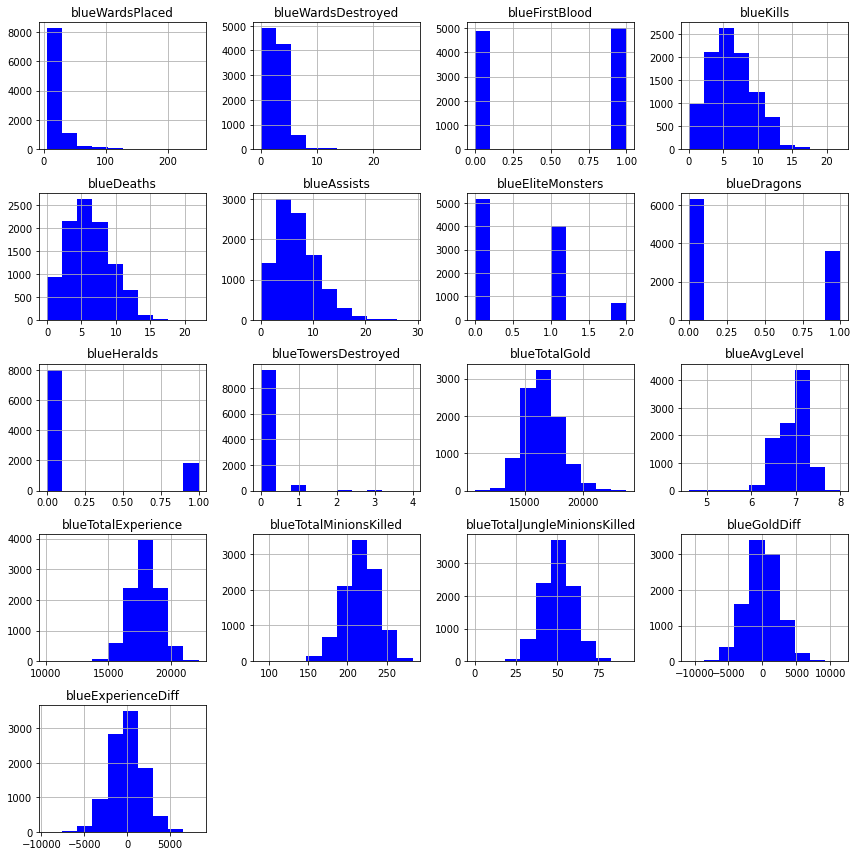

In [12]:
games[blue_team].hist(color = 'BLUE',
                     figsize = (12,12))
plt.tight_layout()
plt.show()

Из гистограммы выше видно, что приблизительно нормальными являются столбцы blueKills, blueDeaths, blueAssists, blueTotalGold, blueAvgLevel, blueTotalExperience, blueTotalMinionsKilled, blueTotalJungleMinionsKilled, blueGoldDiff, blueExperienceDiff, blueCSPerMin и blueGoldPerMin.

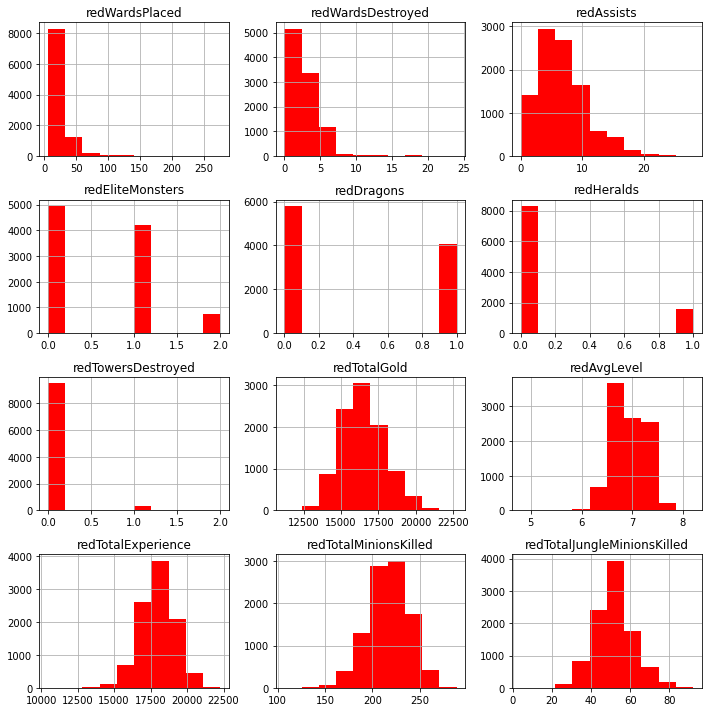

In [13]:
games[red_team].hist(color = 'RED',
                    figsize = (10,10))

plt.tight_layout()
plt.show()

Для красной команды мы видим примерно такую же картину с нормальными распределениями

## Как влияет на игру количество убийств героев и миньонов?

Посмотрим, на то какое влияние оказывает количество убийств героев на количество заработанного золота

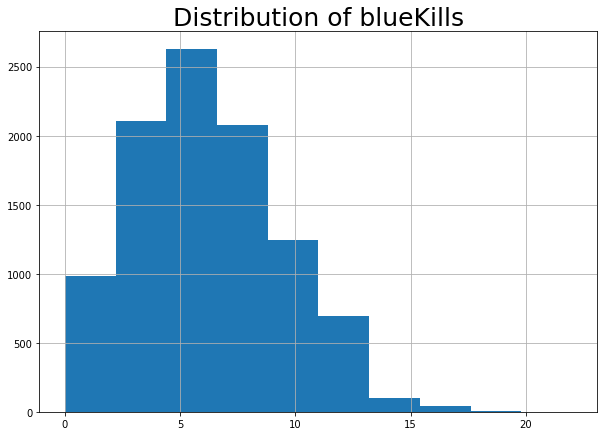

In [14]:
dataframe = games
feature = 'blueKills'

plt.figure(figsize=(10,7))
dataframe[feature].hist()
plt.title(f"Distribution of {feature}",fontsize=25)
plt.show()

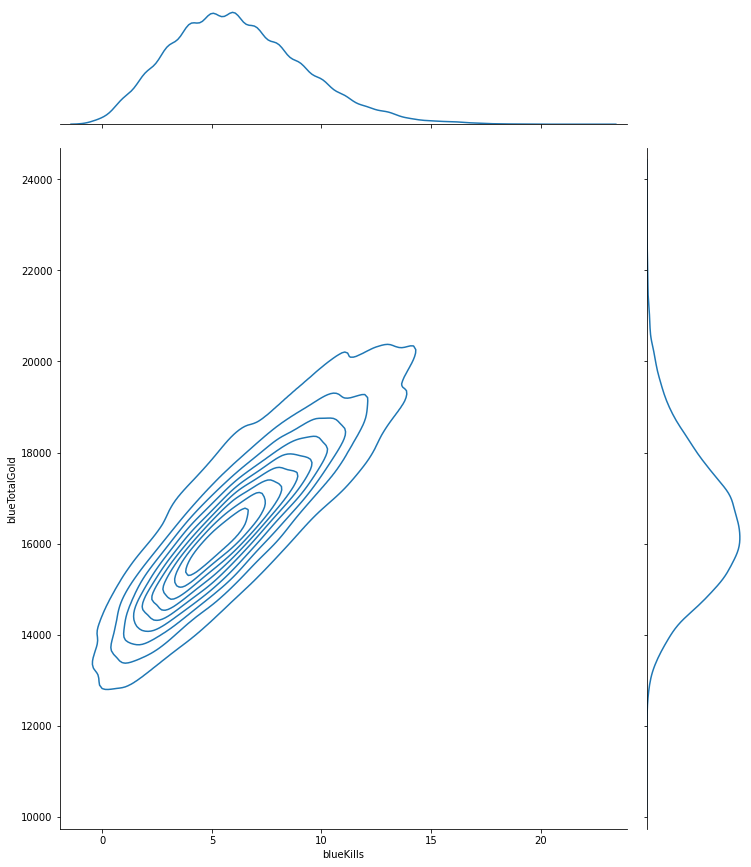

In [15]:
dataframe = games
feature1 = 'blueKills'
feature2 = 'blueTotalGold'

['blueTotalExperience','blueTotalGold','blueKills']
g=sns.jointplot(x=dataframe[feature1], y=dataframe[feature2], kind="kde")
g.fig.set_figwidth(11)
g.fig.set_figheight(13)
plt.show()

Как можно заметить, что чем больше убийств героев совершается, тем больше золота получает команда.

Проверим теперь какое влияние на количество золота оказывают убийства миньонов.

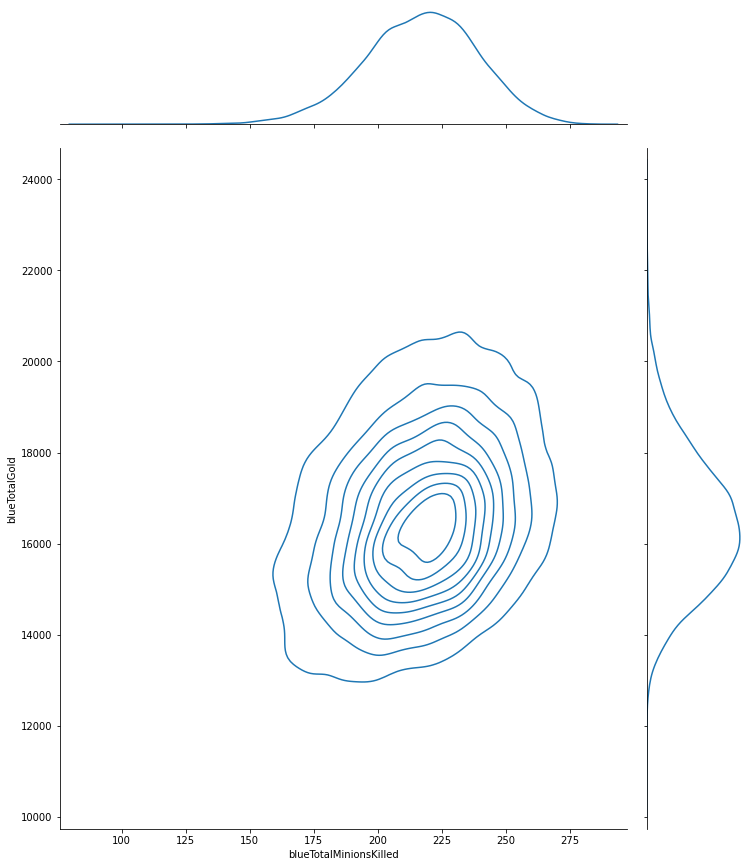

In [16]:
dataframe = games
feature1 = 'blueTotalMinionsKilled'
feature2 = 'blueTotalGold'

['blueTotalExperience','blueTotalGold','blueTotalMinionsKilled']
g=sns.jointplot(x=dataframe[feature1], y=dataframe[feature2], kind="kde")
g.fig.set_figwidth(11)
g.fig.set_figheight(13)
plt.show()

Как можно заметить, какой-то сильной зависимости не наблюдается.

In [17]:
cr = np.corrcoef(games['blueKills'], games['blueTotalGold'])[0][1]
print(f'Корреляция между количеством убийств героев и полученным золотом: {cr}')

cr = np.corrcoef(games['blueTotalMinionsKilled'], games['blueTotalGold'])[0][1]
print(f'Корреляция между количеством убийств миньонов и полученным золотом: {cr}')

Корреляция между количеством убийств героев и полученным золотом: 0.888750863655206
Корреляция между количеством убийств миньонов и полученным золотом: 0.28490229249862403


Можно сделать вывод, что для командной экономики выгоднее убивать героев, чем миньонов.

## Как влияет на игру количество помощи в убийствах (ассистов)?

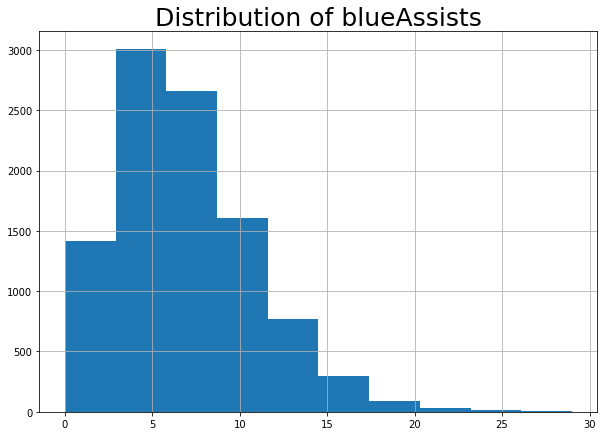

In [18]:
dataframe = games
feature = 'blueAssists'

plt.figure(figsize=(10,7))
dataframe[feature].hist()
plt.title(f"Distribution of {feature}",fontsize=25)
plt.show()

Можно заметить, что распределение очень похоже на распределение убийств. Это может означать, что два эти признака коррелируют между собой. Проверим так ли это?

In [19]:
cr = np.corrcoef(games['blueKills'], games['blueAssists'])[0][1]
print(f'Корреляция между убийства и ассистами: {cr}')

Корреляция между убийства и ассистами: 0.8136672492803579


Высокая корреляция между убийствами и ассистами говорит о том, что большинство убийств совершается с помощью других членов команды.

## Как влияет на игру убийства элитных монстров?

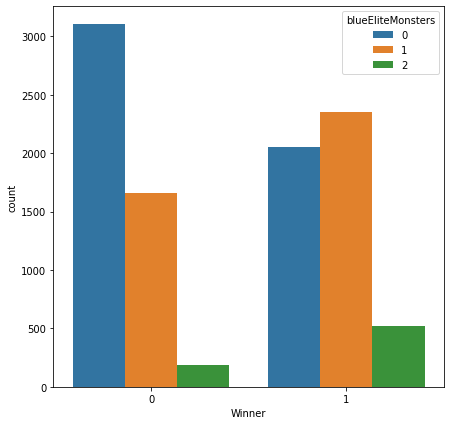

In [20]:
dataframe = games
feature_1 = 'Winner'
feature_2 = 'blueEliteMonsters'
plt.figure(figsize=(7,7))
sns.countplot(data=games,x=feature_1,hue=feature_2)
plt.show()

Можно заметить, что если побеждает красная команда (значение Winner равно 0), то в большинстве игр синяя команда не убивает ни одного элитного монстра, если же побеждает синяя команда (значение Winner равно 1), то в большинстве игр она убивает хотя бы одного элитного монстра.

## Выводы из EDA

1. С точки зрения экономики, убийство героев важнее, чем убийство миньонов на линиях (об этом свидетельствует более высокий коэффициент корреляции).

2. Важна командная игра. Как показал коэффициент корреляции, большинство убийств совершается с помощью напарников по команде. А так как убийства являются важной метрикой для предсказания победителя, следует, что для увеличения шансов на победу, вы не должны пытаться выиграть в одиночку.

3. Характеристики убитых элитных монстров и победителя коррелируют, в том смысле, что победитель, как правило, убивает больше элитных монстров. Хотя следует отметить, что причинно-следственная связь здесь неясна: то ли убийство большего количества монстров увеличивает ваши шансы на победу, то ли тот факт, что вы побеждаете, даёт возможность убивать больше элитных монстров.

## Выбросы в данных

Далее мы визуализируем фичи с помощью ящиков с усами и удалим все статистические отклонения. Для этого анализа мы сохраним все измерения, которые находятся в пределах 3 стандартных отклонений от среднего значения.

Начнем с синей команды.

In [21]:
# выберем признаки, которые "нормально распределены".
normal_columns = ['blueWardsPlaced','blueWardsDestroyed','blueKills','blueDeaths',
                  'blueAssists','blueTotalGold','blueAvgLevel','blueTotalExperience',
                  'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                  'blueGoldDiff','blueExperienceDiff',
                  'redWardsPlaced','redAssists','redTotalGold','redAvgLevel','redTotalExperience',
                  'redTotalMinionsKilled','redTotalJungleMinionsKilled']

# нам нужно сгруппировать столбцы с одинаковым диапазоном, чтобы боксплоты выглядели интерпретируемыми
blue_normal = [column for column in normal_columns if 'blue' in column]

In [22]:
# сгруппируем синие колонки по относительному размеру
small_blue = ['blueWardsPlaced','blueWardsDestroyed', 'blueKills',
              'blueDeaths','blueAssists','blueAvgLevel','blueTotalMinionsKilled',
              'blueTotalJungleMinionsKilled']
large_blue = [column for column in blue_normal if column not in small_blue]

In [23]:
def plot_boxplot(data, subset, color, title):
    plt.figure(figsize = (11,9))
    g = sns.boxplot(data = data[subset], color = color)
    g.set_title(title)
    plt.xticks(rotation = 30)
    plt.show()

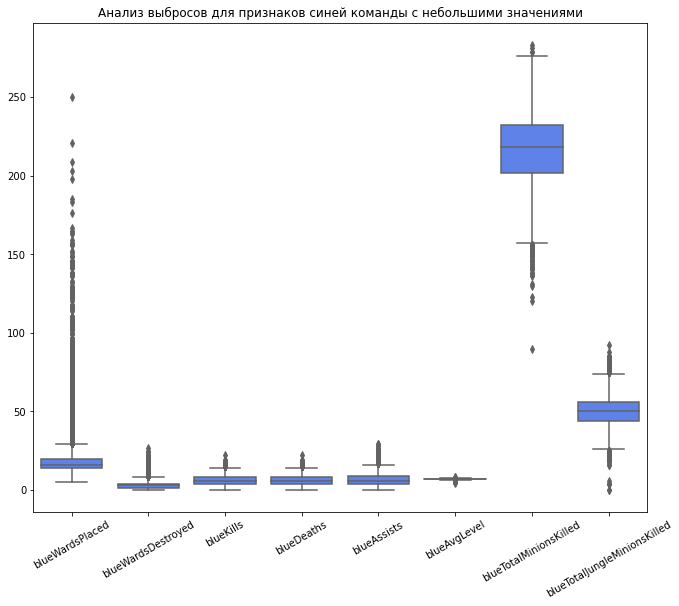

In [24]:
plot_boxplot(games, small_blue, '#4777FF', 'Анализ выбросов для признаков синей команды с небольшими значениями')

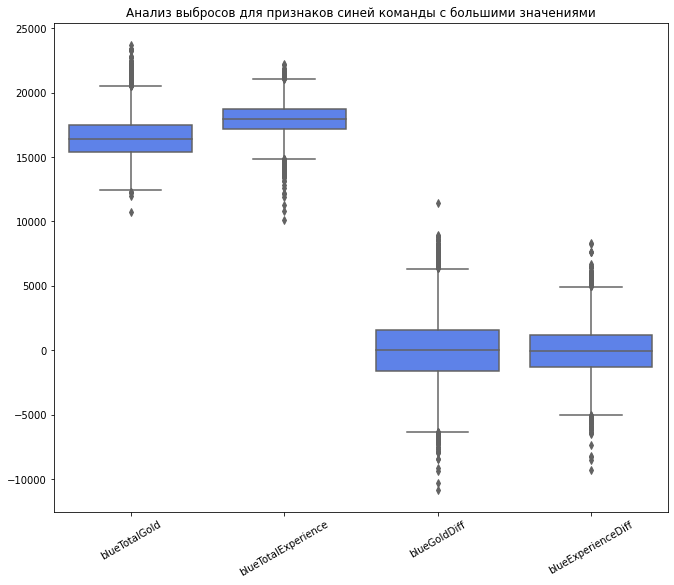

In [25]:
plot_boxplot(games, large_blue, '#4777FF', 'Анализ выбросов для признаков синей команды с большими значениями')

В обоих приведенных выше графиках мы видим много выбросов. Как уже говорилось, мы удалим данные, которые находятся на расстоянии большем, чем 3 стандартных отклонений от среднего значения.

In [26]:
def remove_outliers(data):
    for column in data.columns:
        column_mean = data[column].mean()
        column_std = data[column].std()
        threshold = column_std*3
        lower, upper = column_mean - threshold, column_mean + threshold
        data = data[(data[column] >= lower) & (data[column] <= upper)]
    return data

In [27]:
games_new = remove_outliers(games)

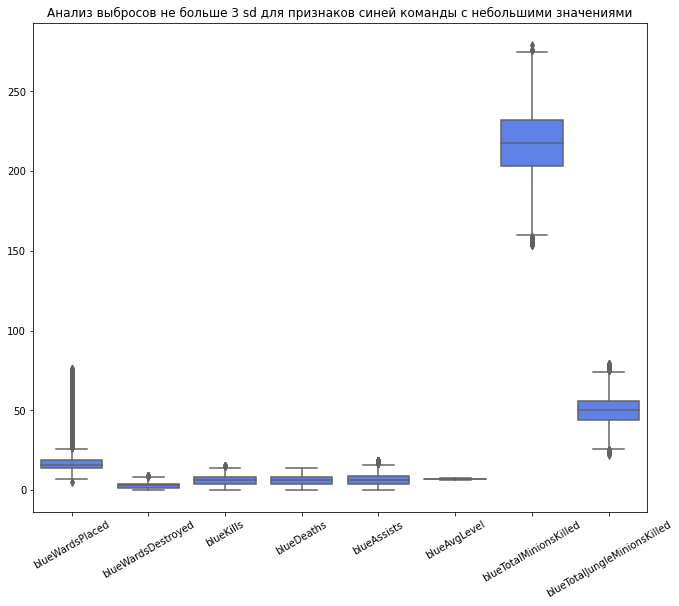

In [28]:
plot_boxplot(games_new, small_blue, '#4777FF', 'Анализ выбросов не больше 3 sd для признаков синей команды с небольшими значениями')

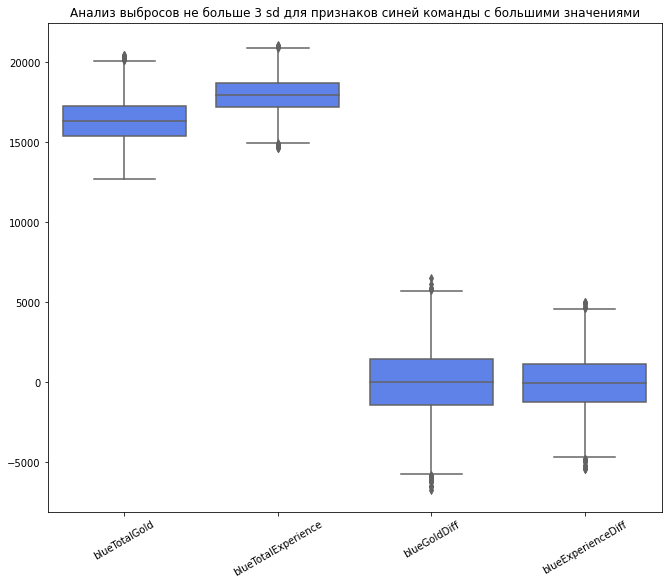

In [29]:
plot_boxplot(games_new, large_blue, '#4777FF', 'Анализ выбросов не больше 3 sd для признаков синей команды с большими значениями')

In [30]:
red_normal = [column for column in normal_columns if 'red' in column]

In [31]:
small_red = ['redWardsPlaced','redAssists','redAvgLevel',
             'redTotalMinionsKilled','redTotalJungleMinionsKilled']
large_red = [column for column in red_normal if column not in small_red]

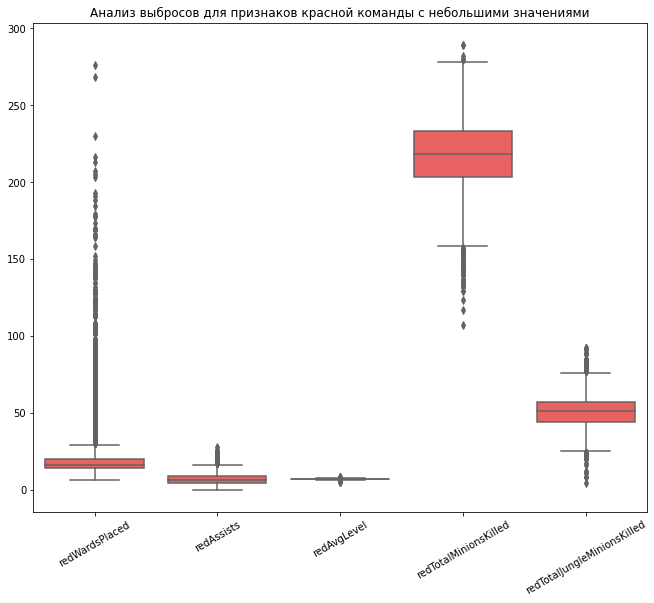

In [32]:
plot_boxplot(games, small_red, '#FF4B4B', 'Анализ выбросов для признаков красной команды с небольшими значениями')

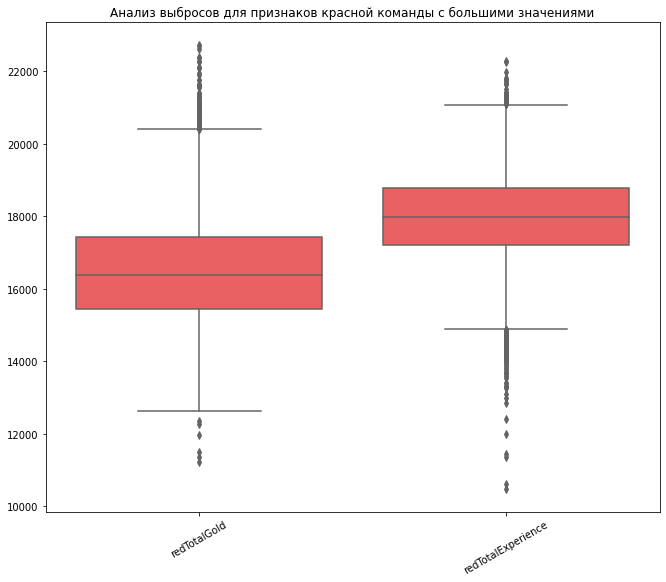

In [33]:
plot_boxplot(games, large_red, '#FF4B4B', 'Анализ выбросов для признаков красной команды с большими значениями')

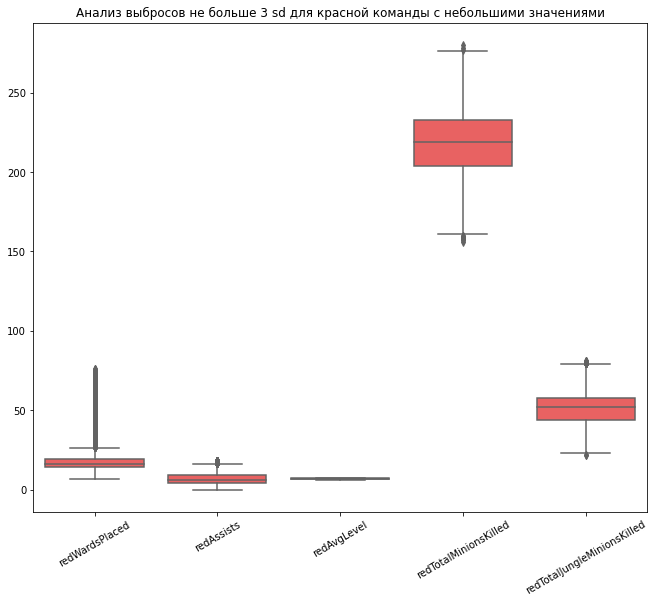

In [34]:
plot_boxplot(games_new, small_red, '#FF4B4B', 'Анализ выбросов не больше 3 sd для красной команды с небольшими значениями')

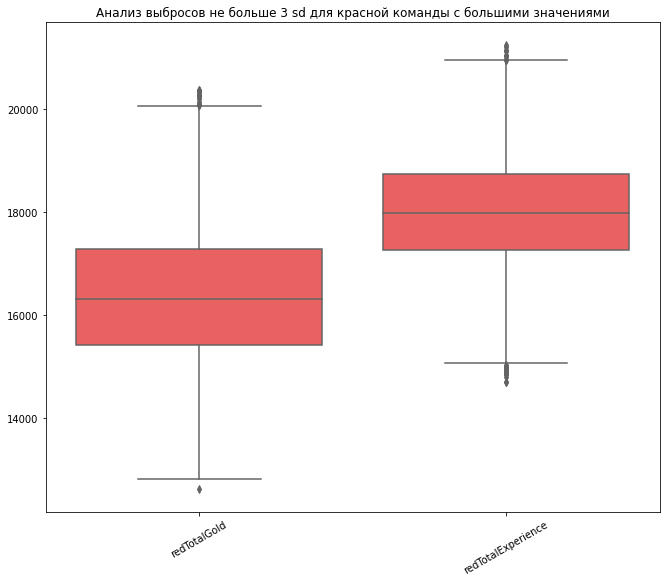

In [35]:
plot_boxplot(games_new, large_red, '#FF4B4B', 'Анализ выбросов не больше 3 sd для красной команды с большими значениями')

## Стандартизация данных

Для использования определённых алгоритмов классификации нам необходимо стандартизировать данные. Для этого используем готовое решение из scikit-learn для стандартизации: StandardScaler

Отделим данные по победам. Сброс индексов и удаление необходимо для того, чтобы при возврате данных о победе не произошло конфликта индексов и некоторые значение не стали NaN

In [36]:
winner = games_new.Winner.reset_index().drop('index', axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
games_st = pd.DataFrame(scaler.fit_transform(games_new.drop('Winner', axis=1)), columns = games_new.drop('Winner', axis=1).columns)
games_st['Winner'] = winner
games_st

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,Winner
0,0.809270,-0.414500,0.993691,1.081860,0.012214,1.231653,-0.862145,-0.751855,-0.452976,0.0,...,-0.903185,-0.838861,-0.414438,0.0,0.139882,-0.479282,-0.867861,-1.033581,0.362966,0
1,-0.460139,-1.599430,-1.006349,0.359187,1.846610,-0.654644,0.760281,1.330043,-0.452976,0.0,...,-0.903185,-0.838861,-0.414438,0.0,0.685595,-0.479282,-0.676501,-0.742635,-2.417147,0
2,2.273972,-1.006965,-1.006349,-0.724823,-0.354665,-0.385173,0.760281,-0.751855,2.207625,0.0,...,-0.903185,-0.838861,-0.414438,0.0,0.072238,0.246764,-0.022917,0.809074,-0.460771,0
3,5.398670,0.770429,-1.006349,-0.002150,0.012214,-0.115702,-0.862145,-0.751855,-0.452976,0.0,...,0.710740,1.192093,-0.414438,0.0,0.776040,0.246764,0.302488,0.324165,1.598571,0
4,-0.167199,-1.599430,-1.006349,-0.363486,-1.088424,-0.115702,0.760281,1.330043,-0.452976,0.0,...,-0.903185,-0.838861,-0.414438,0.0,-0.898340,0.246764,0.068603,0.130201,0.774834,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,-0.167199,-0.414500,0.993691,2.165869,0.012214,1.770594,-0.862145,-0.751855,-0.452976,0.0,...,-0.903185,-0.838861,-0.414438,0.0,-0.341227,-1.205329,-0.886350,-1.033581,-1.387476,1
7896,-0.264845,-0.414500,0.993691,0.359187,-0.721545,-0.385173,0.760281,1.330043,-0.452976,0.0,...,-0.903185,-0.838861,-0.414438,0.0,-0.864138,-0.479282,-1.375382,0.518129,-1.799344,1
7897,0.321036,-1.006965,-1.006349,-0.002150,0.379093,-0.385173,-0.862145,-0.751855,-0.452976,0.0,...,0.710740,1.192093,-0.414438,0.0,1.471481,1.698856,1.777904,2.069838,0.877801,0
7898,-0.557786,0.770429,0.993691,-1.447495,-1.088424,-0.924115,0.760281,1.330043,-0.452976,0.0,...,-0.903185,-0.838861,-0.414438,0.0,-0.824615,0.972810,0.303412,1.390965,-1.181541,0


## Подготовка к обучению
Построим график важности фичей, т.е. те, которые имеют наибольшую важность для предсказания. Используем для этого "случайный лес":

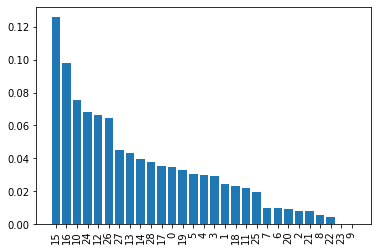

In [38]:
X = games_st.drop(['Winner'], axis=1)
y = games_st['Winner']

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X, y)

importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(len(indices)),importances[indices])
plt.xticks(range(len(indices)), indices,rotation=90)
plt.show()

Отберём топ 10 фичей для дальнейшей работы

In [39]:
X.iloc[:,indices[:10]].head()

,blueGoldDiff,blueExperienceDiff,blueTotalGold,redTotalGold,blueTotalExperience,redTotalExperience,redTotalMinionsKilled,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redTotalJungleMinionsKilled
0,0.309602,0.022503,0.622117,0.139882,-0.829884,-0.867861,-1.033581,-1.081490,-1.552360,0.362966
1,-0.559830,-0.583750,-0.199770,0.685595,-1.583534,-0.676501,-0.742635,-1.515608,-0.493844,-2.417147
2,-0.631205,0.023094,-0.916018,0.072238,0.013134,-0.022917,0.809074,-0.792078,0.458820,-0.460771
3,-0.479354,0.163272,0.015254,0.776040,0.555799,0.302488,0.324165,-0.357961,0.670523,1.598571
4,0.335949,0.086973,-0.360102,-0.898340,0.203850,0.068603,0.130201,0.365569,-0.917251,0.774834


In [40]:
X = X.iloc[:,indices[:10]]

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
metrics_score = pd.DataFrame(columns=['precision', 'recall', 'f-value', 'roc_auc'])

# Выбор модели предсказания

Для оценки качества работы алгоритма на каждом из классов по отдельности мы будем использовать метрики precision (точность) и recall (полнота).

***Precision*** можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными.

***Recall*** показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

**F-мера** - это среднее гармоническое precision и recall:

 $\huge F = \frac {2 \cdot precision \cdot recall} {precision + recall} $
 
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.


Также для интереса мы посмотрим на **roc_auc_score**

При конвертации вещественного ответа алгоритма (как правило, вероятности принадлежности к классу) в бинарную метку, мы должны выбрать какой-либо порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он не всегда оказывается оптимальным, например, при вышеупомянутом отсутствии баланса классов.

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR)

TPR нам уже известна, это полнота, а FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно. 

В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.

Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

В данной работе я не буду рассматривать базовые алгоритмы классификации, такие как метод k-ближайших соседей, метод опорных векторов, дерево решений и случайный лес. Т.к. они уже были рассмотрены мной в похожей [задаче](https://github.com/bet-in/my_test_notebooks/blob/main/california-house-price.ipynb)

## Стохастический градиентный спуск

Оптимизационный алгоритм, отличающийся от обычного градиентного спуска тем, что градиент оптимизируемой функции считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента.

Градиент -  это вектор, своим направлением указывающий направление наибольшего возрастания некоторой скалярной величины (значение которой меняется от одной точки пространства к другой), а по величине (модулю) равный скорости роста этой величины в этом направлении.

In [44]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
parameters_sgd = {'loss': ['hinge', 'log'], 'max_iter': range(500, 2001, 500), 'alpha': [0.0001, 0.001, 0.005, 0.01]} #словарь с параметрами 
grid_search_cv_sgd = GridSearchCV(sgd, parameters_sgd, cv=5)


In [45]:
grid_search_cv_sgd.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.01],
                         'loss': ['hinge', 'log'],
                         'max_iter': range(500, 2001, 500)})

In [46]:
best_sgd = grid_search_cv_sgd.best_estimator_
grid_search_cv_sgd.best_params_

{'alpha': 0.005, 'loss': 'hinge', 'max_iter': 500}

In [47]:
y_pred = best_sgd.predict(X_test)

In [48]:
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('f-value:', f1_score(y_test, y_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_pred))

Precision: 0.7057522123893806
Recall: 0.7322111706197398
f-value: 0.7187382651145326
roc_auc_score: 0.7126440468483315


In [49]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'roc_auc': roc_auc_score(y_test, y_pred)},
                                     ignore_index=True)

## Логистическая регрессия

In [50]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)

parameters_lr = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': range(100, 501, 100)} #словарь с параметрами 
grid_search_cv_lr = GridSearchCV(lr, parameters_lr, cv=5)

In [51]:
grid_search_cv_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': range(100, 501, 100),
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [52]:
best_lr = grid_search_cv_lr.best_estimator_
grid_search_cv_lr.best_params_

{'max_iter': 100, 'solver': 'newton-cg'}

In [53]:
y_pred = best_lr.predict(X_test)

In [54]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'roc_auc': roc_auc_score(y_test, y_pred)},
                                     ignore_index=True)

## XGBoost

В **XGBoost** выделяют три группы параметров:

Общие параметры, отвечающие за базовый алгоритм для бустинга и распараллеливание.
Параметры выбранного базового алгоритма.
Параметры обучения, отвечающие за функцию потерь и метрику качества на валидации.
1. Общие параметры:

* booster [default=gbtree] - тип базового алгоритма для бустинга: дерево решений gbtree или линейная модель gblinear.
* silent [default=0] - выдавать (silent=0) или нет (silent=1) сообщения по ходу работы алгоритма.
* nthread [default to maximum number of threads available if not set] - число нитей доступных для параллельной работы xgboost.

2. Параметры базового алгоритма:

2.1. Дерево решений:

* eta [default=0.3] - темп обучения, перед добавлением дерева в композицию оно умножается на eta. Используется для предотвращения переобучения за счёт "сокращения" весов базовых алгоритмов, делая модель более консервативной. Чем меньше eta, тем больше нужно итераций num_boost_round для обучения модели с хорошим качеством. Диапазон: [0, 1]
* gamma [default=0] - минимальное снижение значения функции потерь, необходимое для дальнейшего разбиения вершины дерева. Большие значения gamma > 0 приводят к более консервативным моделям. Диапазон: [0, $\infty$).
* max_depth [default=6] - максимальная глубина дерева. Диапазон: [1, $\infty$).
* min_child_weight [default=1] - минимальное необходимое (взвешенное) число примеров в каждой вершине. Чем больше, тем более консервативна итоговая модель. Диапазон: [0, $\infty$).
* max_delta_step [default=0] - обычно равен нулю. Положительные значения используются при несбалансированных классах для ускорения сходимости. Диапазон [0, $\infty$).
* subsample [default=1] - доля выборки, используемая для обучения каждого дерева. Если subsample < 1, то выбирается случайная подвыборка, что помогает в борьбе с переобучением. Диапазон: (0, 1]
* colsample_bytree [default=1] - доля признаков, используемая для обучения каждого дерева. Диапазон: (0, 1]
* lambda [default=1] - коэффициент перед $L_2$-регуляризатором в функции потерь.
* alpha [default=0] - коэффициент перед $L_1$-регуляризатором в функции потерь.

2.2. Линейная модель:

* lambda [default=0] - коэффициент перед $L_2$-регуляризатором вектора весов в функции потерь.
* alpha [default=0] - коэффициент перед $L_1$-регуляризатором вектора весов в функции потерь.
* lambda_bias [default=0] - коэффициент перед $L_2$-регуляризатором смещения (свободного члена) в функции потерь.

3. Параметры задачи обучения:

* objective [default=reg:linear] - используемая при обучении функция потерь:
* "reg:linear" – линейная регрессия.
* "reg:logistic" – логистическая регрессия.
* "binary:logistic" – логистическая регрессия для бинарной классификации, на выходе - вероятность.
* "binary:logitraw" – то же самое, но на выходе - значение до его преобразования логистической функцией.
* "count:poisson" – регрессия Пуассона (используется для оценки числа каких-то событий, счётный признак), на выходе - матожидания распределения Пуассона. В этом случае max_delta_step автоматически устанавливается равным 0.7.
* "multi:softmax" – обобщение логистической регрессии на многоклассовый случай. При этом нужно задать параметр num_class.
* "multi:softprob" – то же самое, но на выходе - вектор размера ndata * nclass, который можно преобразовать в матрицу, содержащую вероятности отнесения данного объекта к данному классу.
* "rank:pairwise" – используется для задач ранжирования.
* base_score [default=0.5] - инициализация значения модели для всех примеров, глобальное смещение.
* eval_metric [default according to objective] - метрика качества на валидационной выборке (по умолчанию соответствует функции потерь: rmse - для регрессии, error - для классификации, mean average precision - для ранжирования). Выбрать можно одну из следующих метрик:
* "rmse": root mean square error.
* "logloss": минус логарифм правдоподобия.
* "error": доля ошибок для бинарной классификации.
* "merror": то же самое для многоклассовой классификации.
* "mlogloss": logloss для многоклассовой классификации.
* "auc": AUC.
* "ndcg": Normalized Discounted Cumulative Gain.
* "map": Mean average precision.
* "ndcg@n",”map@n”: здесь n - целое число, первые n позиций в списке не учитываются.
* "ndcg-",”map-”,”ndcg@n-”,”map@n-”: списку из всех положительных примеров будет присвоено значение 0 (вместо 1).
* seed [default=0] - для воспроизводимости "случайности".

In [55]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
parameters_xgb = {                                       #словарь с параметрами 
    'objective': ["reg:logistic"],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.3, 0.5],
    "eval_metric": ["error"]
} 

Для начала попробуем обучить модель на XGBoost "из коробки", т.е. не настраивая параметры

In [56]:
xgb_model.fit(X_train, y_train)

[23:24:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
y_pred = xgb_model.predict(X_test)

In [58]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'roc_auc': roc_auc_score(y_test, y_pred)},
                                     ignore_index=True)

А теперь попробуем подобрать наилучшие параметры из указанных нами.

In [59]:
xgb_grid = GridSearchCV(xgb_model, parameters_xgb, cv=5)

In [60]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [61]:
best_xgb = xgb_grid.best_estimator_
xgb_grid.best_params_

{'eval_metric': 'error',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100,
 'objective': 'reg:logistic'}

In [62]:
y_pred = xgb_grid.predict(X_test)

In [63]:
metrics_score = metrics_score.append({'precision': precision_score(y_test, y_pred), 
                                      'recall': recall_score(y_test, y_pred), 
                                      'f-value': f1_score(y_test, y_pred), 
                                      'roc_auc': roc_auc_score(y_test, y_pred)},
                                     ignore_index=True)

In [64]:
metrics_score = metrics_score.rename(index={0: 'SGDClassifier',
                            1: 'logistic_regression',
                            2: 'XGBoost',
                            3: 'XGBoost_grid'})
metrics_score 

,precision,recall,f-value,roc_auc
SGDClassifier,0.705752,0.732211,0.718738,0.712644
logistic_regression,0.719750,0.705432,0.712519,0.714639
XGBoost,0.678384,0.693956,0.686082,0.681593
XGBoost_grid,0.703159,0.732211,0.717391,0.710721


**Исходя из полученных данных мы можем сделать вывод, что для нашей задачи классификации наилучшим решением будет использование классификатора на основе стохастического градиентного спуска (f1 score наибольший) или простой логистической регрессии (roc auc score наибольший). Вероятнее всего это связано с тем, что параметры для XGBoost были неправильно подобраны или преимущество XGBoost проявилось при большем количестве фичей (напомню, что мы искуственно ограничили их количество до 10 самых значимых)**